In [1]:
%matplotlib inline
import numpy as np
from pylab import *


Neuron parameters

In [2]:
dt = 0.01;
n_steps = 10000;


E_Na = +55 
E_K = -75
E_L = -69

g_Na = 120
g_K  = 36
g_L  = 0.3

C = 0.5;  

In [3]:
m = np.zeros((n_steps,))
n = np.zeros((n_steps,))
h = np.zeros((n_steps,))

u = np.ones((n_steps,))
             
ampl = 10
I_in = ampl*np.ones((n_steps,))
             
u[0] = -65
m[0] = 0.05
n[0] = 0.31
h[0] = 0.6

Anonymous functions to compute the gating variable parameters

In [4]:
alpha_n = lambda u: (0.1-0.01*(u+65))/(exp(1-0.1*(u+65))-1)
beta_n  = lambda u: 0.125*exp(-(u)/80)
alpha_m = lambda u: (2.5-0.1*(u+65))/(exp(2.5-0.1*(u+65))-1)
beta_m  = lambda u: 4*exp(-(u+65)/18)
alpha_h = lambda u: 0.07*exp(-(u+65)/20)
beta_h  = lambda u: 1/(exp(3.0-0.1*(u+65))+1)

In [5]:
for i in arange(n_steps-1):
    
    n[i+1] = n[i] + dt*(alpha_n(u[i]) * (1-n[i])-beta_n(u[i])*n[i])
    m[i+1] = m[i] + dt*(alpha_m(u[i]) * (1-m[i])-beta_m(u[i])*m[i])
    h[i+1] = h[i] + dt*(alpha_h(u[i]) * (1-h[i])-beta_h(u[i])*h[i])
    
    I_k_sum = g_Na*m[i]**3*h[i]*(u[i]-E_Na) + g_K*n[i]**4*(u[i]-E_K)+g_L*(u[i]-E_L)
    u[i+1]  = u[i]+dt*(I_in[i]-I_k_sum)/C



Plotting

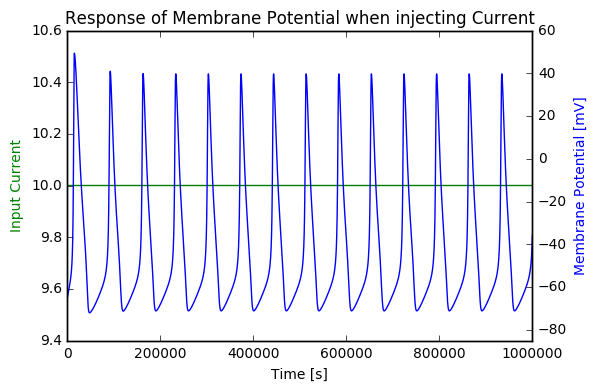

In [6]:
tt = np.linspace(0, n_steps/dt, n_steps)
fig, ax1 = subplots()

ax2 = ax1.twinx()
ax1.plot(tt, I_in, 'g-')
ax2.plot(tt, u, 'b-')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Input Current', color='g') # which unit?
ax2.set_ylabel('Membrane Potential [mV]', color='b')
ax2.set_ylim([-85, 60])
title("Response of Membrane Potential when injecting Current")
show()

# for regime plot: contour
